### Part 1.1 a - Read ‘Car name.csv’ as a DataFrame and assign it to a variable

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
car = pd.read_csv('car name.csv')

In [3]:
car.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [4]:
car.shape

(398, 1)

### Part 1.1 b - Read ‘Car-Attributes.json as a DataFrame  and assign it to a variable.

In [5]:
car_attr = pd.read_json('Car-Attributes.json')

In [6]:
car_attr

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


### Part 1.1 c - Merge both the DataFrames together to form a single DataFrame

In [7]:
df = pd.concat([car,car_attr],axis=1)
df.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [8]:
df.shape

(398, 9)

### Part 1.1 d - Print 5 point summary of the numerical features and share insights.

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


### Part 1.2 a - Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach.

In [10]:
df.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


### Part 1.2 b - Check for duplicate values in the data and impute with the best suitable approach.

In [12]:
any(df.duplicated())

False

#### None are duplicated values

### Part 1.2 c - Plot a pairplot for all features.

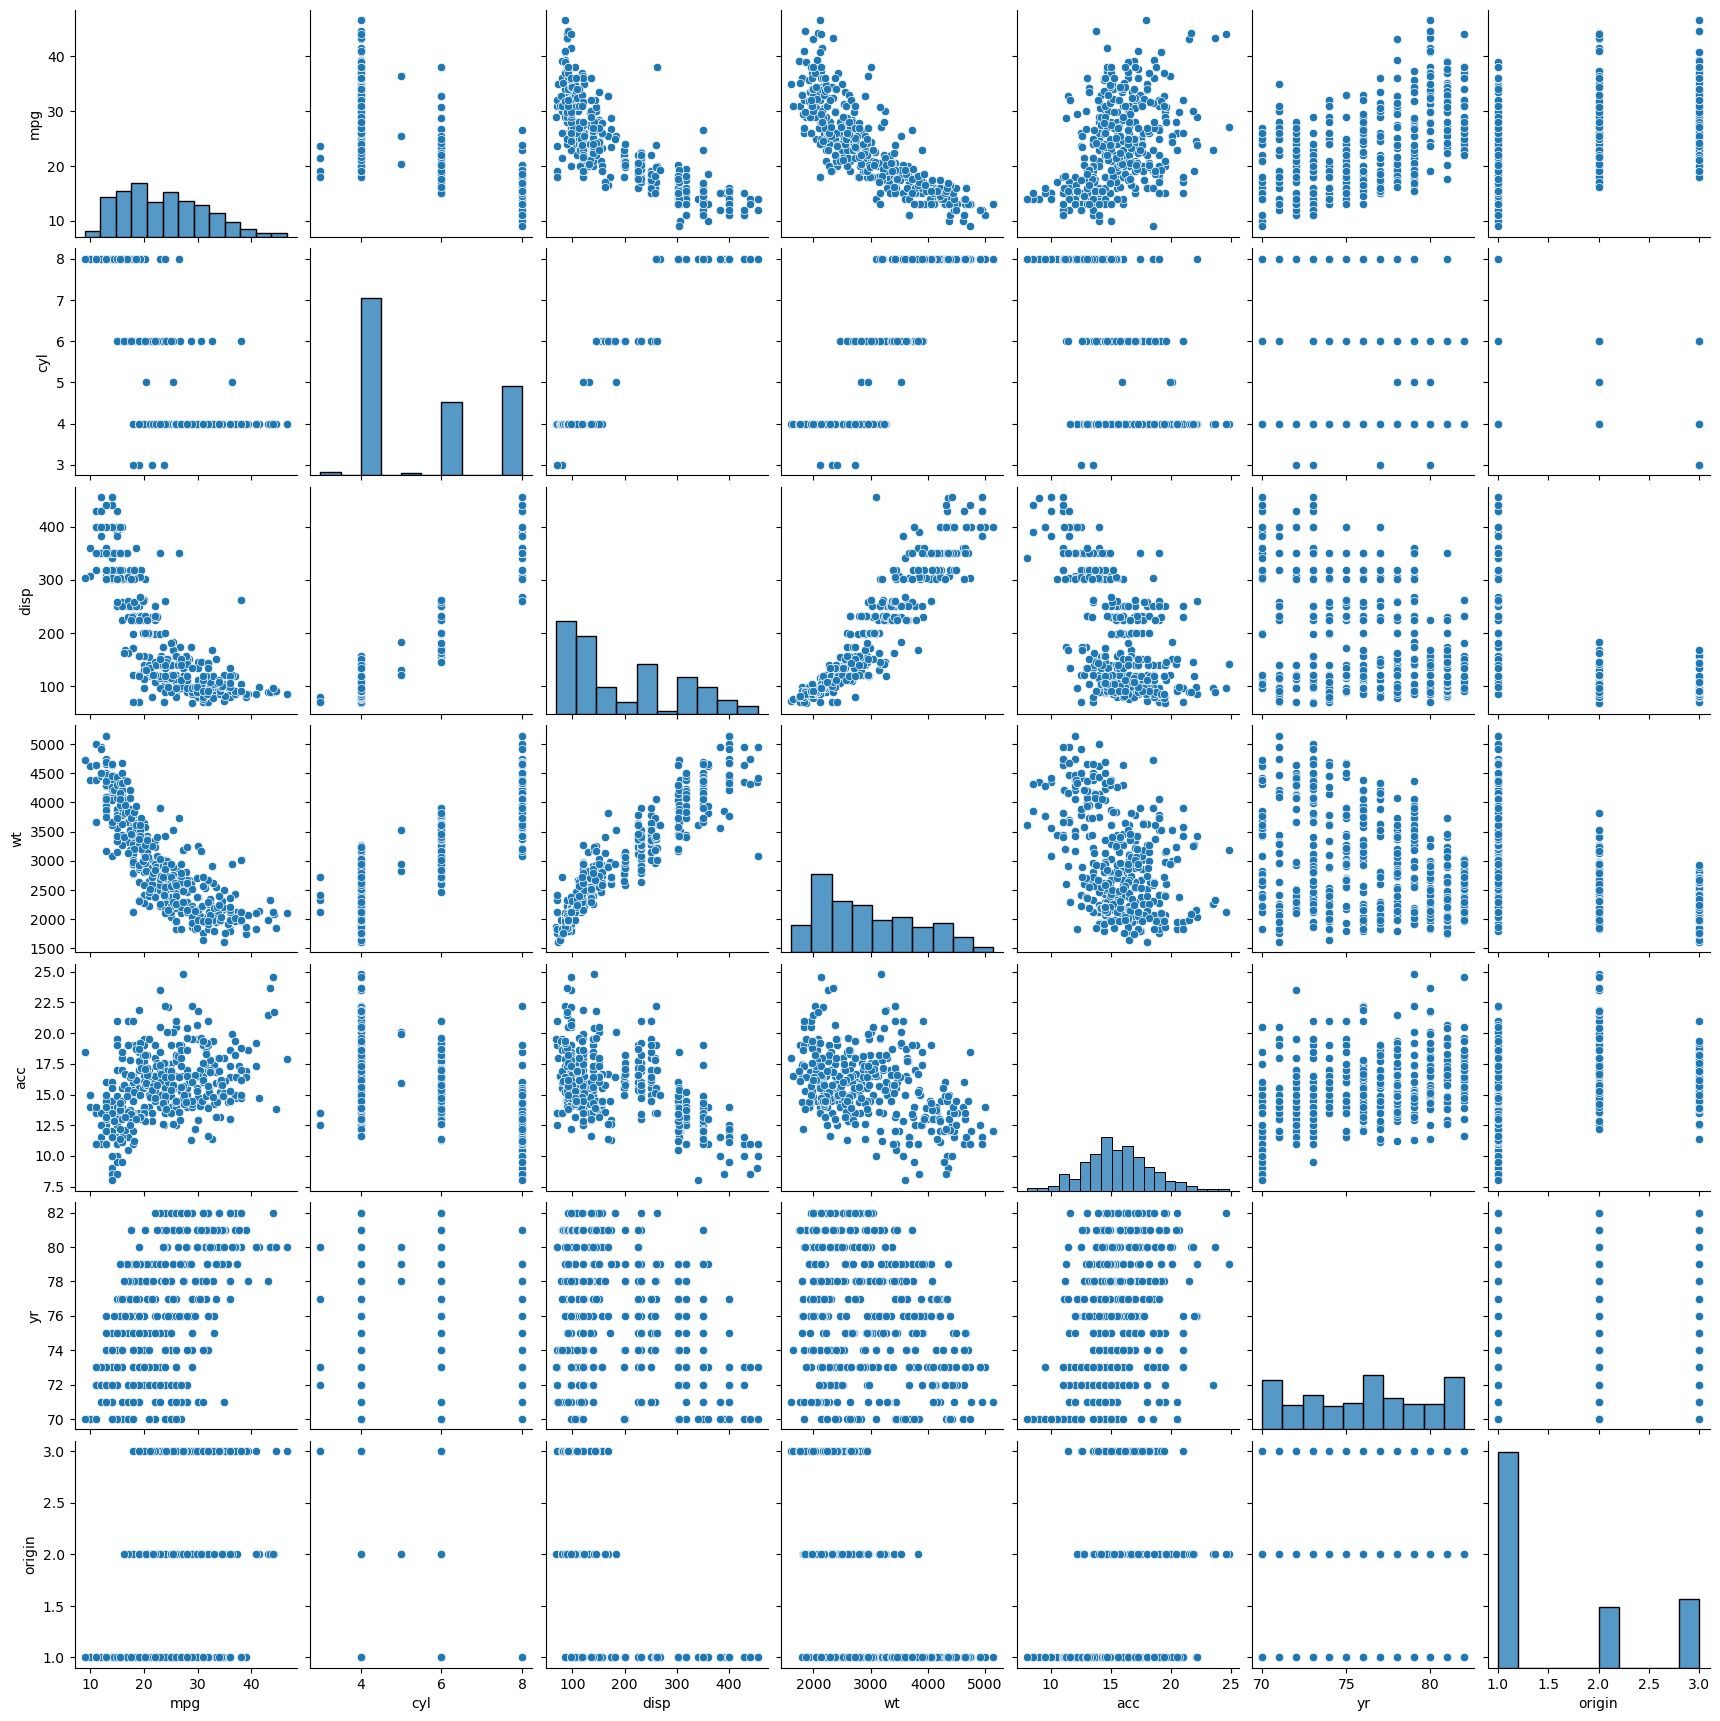

In [13]:
sns.pairplot(df)

### Part 1.2 d - Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’

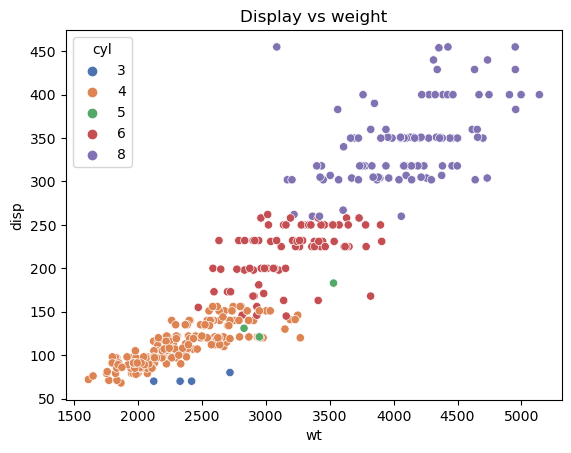

In [14]:
sns.scatterplot(x='wt',y='disp',data=df,hue='cyl',palette='deep');
plt.title('Display vs weight');

### Part 1.2 e - Share insights for Q2.d.

<ul>
    <li>Relationship between disp and wt is linear</li>
    <li>As the number of cylinders increase, we can observe higher disp and weights. As shown via the colors indicated by the legend.</li>
    <li>There's one outlier observed with a weight of 3000 with a staggering disp of 450 and 8 cylinders</li>
</ul>

### Part 1.2 f - Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’

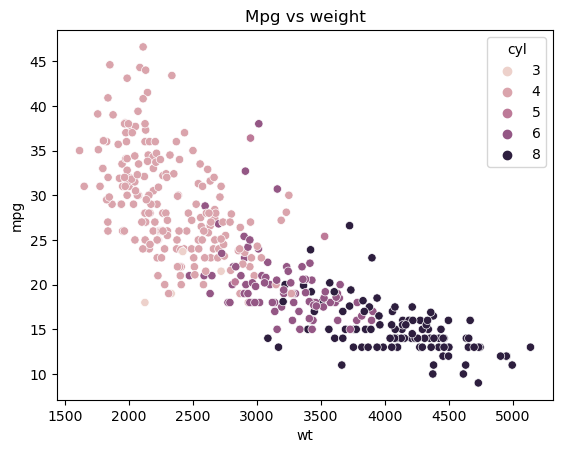

In [15]:
sns.scatterplot(x='wt',y='mpg',data=df,hue='cyl');
plt.title('Mpg vs weight');

### Part 1.2 g- Share insights for Q2.f.

<ul>
    <li>Scatter plot indicates a linearly decreasing relationship between mpg and wt</li>
    <li>As the number of cylinders increase the mpg decreases, but the weight increases</li>
</ul>

### Part 1.2 h - Check for unexpected values in all the features and datapoints with such values.

In [16]:
for i in df.columns:
    if i != 'car_name':
        print(f'{i}: {df[i].unique()}')

mpg: [18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]
cyl: [8 4 6 3 5]
disp: [307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113.  198.  199.  200.   97.  110.  107.  104.  121.  360.  140.
  98.  232.  225.  250.  351.  258.  122.  116.   79.   88.   71.   72.
  91.   97.5  70.  120.   96.  108.  155.   68.  114.  156.   76.   83.
  90.  231.  262.  134.  119.

##### hp has an unexpected value '?' and will have to be imputed

In [17]:
df['hp'] = df['hp'].replace('?',np.nan)
df['hp'].fillna(df['hp'].median(),inplace=True)

In [18]:
df.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [19]:
df['hp'].unique()

array([130. , 165. , 150. , 140. , 198. , 220. , 215. , 225. , 190. ,
       170. , 160. ,  95. ,  97. ,  85. ,  88. ,  46. ,  87. ,  90. ,
       113. , 200. , 210. , 193. ,  93.5, 100. , 105. , 175. , 153. ,
       180. , 110. ,  72. ,  86. ,  70. ,  76. ,  65. ,  69. ,  60. ,
        80. ,  54. , 208. , 155. , 112. ,  92. , 145. , 137. , 158. ,
       167. ,  94. , 107. , 230. ,  49. ,  75. ,  91. , 122. ,  67. ,
        83. ,  78. ,  52. ,  61. ,  93. , 148. , 129. ,  96. ,  71. ,
        98. , 115. ,  53. ,  81. ,  79. , 120. , 152. , 102. , 108. ,
        68. ,  58. , 149. ,  89. ,  63. ,  48. ,  66. , 139. , 103. ,
       125. , 133. , 138. , 135. , 142. ,  77. ,  62. , 132. ,  84. ,
        64. ,  74. , 116. ,  82. ])

### Part 1.3 a - Apply K-Means clustering for 2 to 10 clusters.

In [20]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

X = df.iloc[:,1:]

#within clustur sum of squares(WCSS)
wcss = {}

for i in range(2,11):
    #building and fitting the model
    model = KMeans(n_clusters = i).fit(X)
    model.fit(X)
    # creating wcss and appending the distances which are euclidean
    wcss[i] = sum(np.min(cdist(X,model.cluster_centers_,'euclidean'),axis=1)/X.shape[0])

C:\Users\5590\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\5590\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\5590\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\5590\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

C:\Users\5590\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\5590\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\5590\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\5590\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

In [21]:
wcss

{2: 369.74137249804653,
 3: 247.81589224238664,
 4: 183.3656308343693,
 5: 158.93963492130365,
 6: 140.0883359881459,
 7: 121.9470500213489,
 8: 103.83255955887027,
 9: 95.82775855447622,
 10: 88.1899088699628}

### Part 1.3 b - Plot a visual and find elbow point.

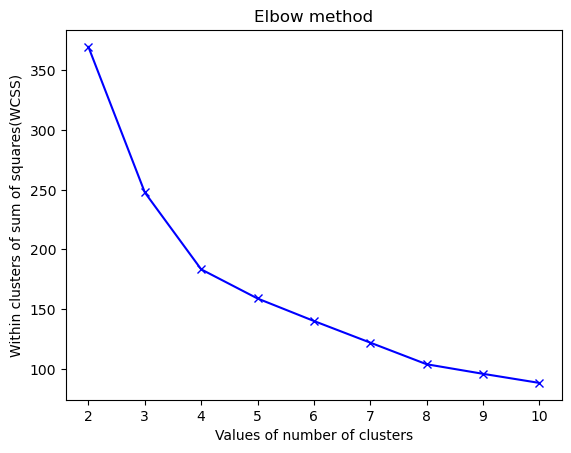

In [22]:

def plotElbow(point: int = 0):
    plt.plot(wcss.keys(),wcss.values(),'bx-')
    if not point==0:
        plt.plot(point,wcss[point],'rs')
    plt.xlabel('Values of number of clusters')
    plt.ylabel('Within clusters of sum of squares(WCSS)')
    plt.title('Elbow method')
    plt.show();
plotElbow()

### Part 1.3 c - On the above visual, highlight which are the possible Elbow points

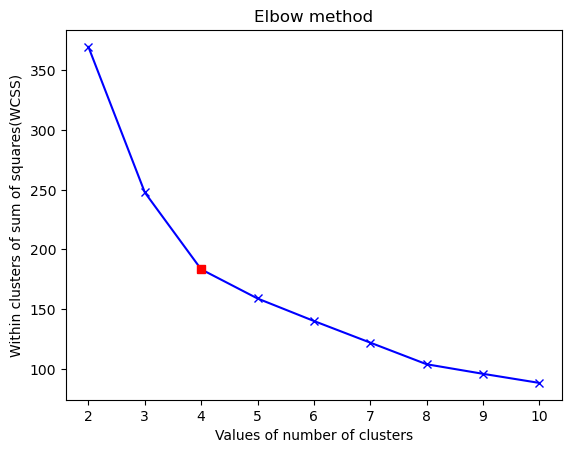

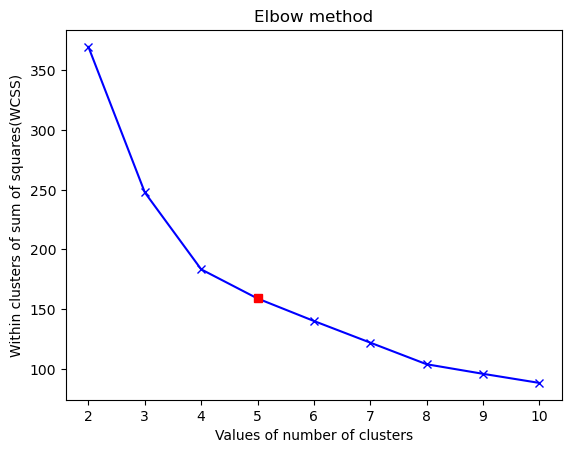

In [23]:
#possible elbow points
a,b = 4,5

plotElbow(a)
plotElbow(b)

### Part 1.3 d - Train a K-means clustering model once again on the optimal number of clusters.

In [24]:
model_optimal = KMeans(n_clusters = b,n_init='auto')
model_optimal.fit(X)

C:\Users\5590\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=5, n_init='auto')

In [25]:
model_optimal.labels_

array([0, 2, 0, 0, 0, 4, 4, 4, 4, 2, 2, 2, 2, 0, 1, 1, 1, 1, 3, 3, 1, 1,
       1, 3, 1, 4, 4, 4, 4, 3, 3, 3, 3, 1, 0, 0, 0, 0, 4, 4, 2, 2, 4, 4,
       4, 0, 1, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 4, 4, 2, 2,
       2, 4, 4, 4, 4, 3, 2, 2, 4, 2, 1, 1, 0, 3, 1, 3, 1, 3, 3, 2, 2, 2,
       2, 2, 4, 4, 4, 4, 4, 4, 2, 0, 0, 1, 0, 1, 3, 4, 4, 4, 4, 1, 3, 1,
       1, 3, 3, 1, 3, 2, 4, 3, 3, 1, 1, 0, 1, 1, 2, 0, 1, 1, 0, 3, 1, 3,
       1, 2, 2, 2, 2, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 0, 0,
       0, 0, 4, 4, 4, 4, 2, 2, 2, 2, 0, 0, 0, 3, 1, 1, 1, 1, 3, 1, 0, 3,
       0, 1, 1, 1, 1, 3, 1, 3, 1, 3, 3, 4, 4, 2, 4, 0, 0, 0, 0, 3, 3, 3,
       3, 2, 2, 2, 0, 3, 3, 3, 1, 0, 2, 0, 1, 2, 4, 2, 2, 2, 3, 3, 3, 3,
       3, 2, 2, 2, 4, 0, 0, 2, 0, 4, 2, 4, 4, 3, 1, 3, 1, 3, 3, 3, 3, 1,
       1, 1, 3, 3, 3, 3, 3, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 2, 3, 1, 3, 3, 1, 1, 1, 1, 1, 0, 1, 0, 3, 3, 0, 0, 1, 0, 0, 2,
       2, 2, 2, 4, 2, 2, 2, 3, 3, 3, 1, 0, 2, 0, 0,

In [26]:
model_optimal.cluster_centers_

array([[1.98826087e+01, 6.10144928e+00, 2.30159420e+02, 1.03905797e+02,
        3.25720290e+03, 1.64318841e+01, 7.61014493e+01, 1.14492754e+00],
       [2.51010000e+01, 4.46000000e+00, 1.42370000e+02, 9.36700000e+01,
        2.66128000e+03, 1.56560000e+01, 7.70000000e+01, 1.66000000e+00],
       [1.61214286e+01, 7.53571429e+00, 3.06732143e+02, 1.36321429e+02,
        3.85869643e+03, 1.43446429e+01, 7.49642857e+01, 1.01785714e+00],
       [3.13688000e+01, 3.98400000e+00, 9.58760000e+01, 7.18920000e+01,
        2.07492000e+03, 1.66352000e+01, 7.67520000e+01, 2.20800000e+00],
       [1.36020833e+01, 8.00000000e+00, 3.68833333e+02, 1.74083333e+02,
        4.49795833e+03, 1.27916667e+01, 7.31041667e+01, 1.00000000e+00]])

### Part 1.3 e - Add a new feature in the DataFrame which will have labels based upon cluster value

In [27]:
df['label'] = model_optimal.labels_

In [28]:
df.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,label
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,0
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,2
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,0
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,0
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,0


In [29]:
df['label'].unique()

array([0, 2, 4, 1, 3])

### Part 1.3 f -Plot a visual and color the datapoints based upon clusters.

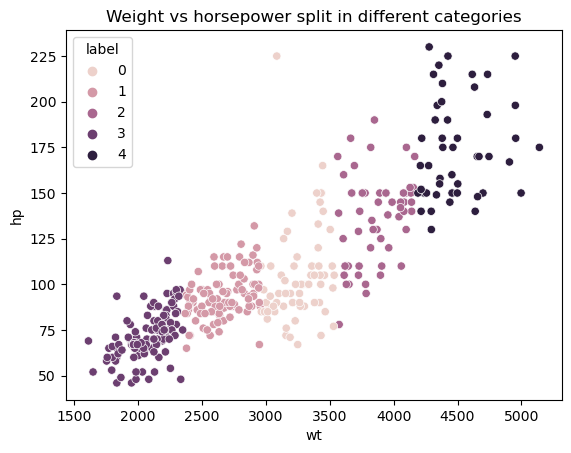

In [30]:
sns.scatterplot(x='wt',y='hp',data=df,hue='label')
plt.title('Weight vs horsepower split in different categories');

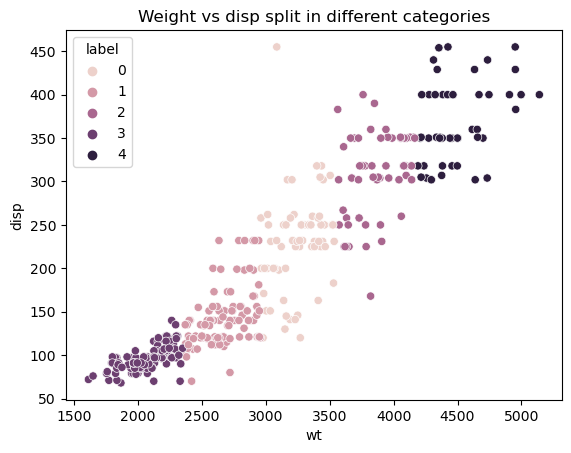

In [31]:
sns.scatterplot(x='wt',y='disp',data=df,hue='label')
plt.title('Weight vs disp split in different categories');

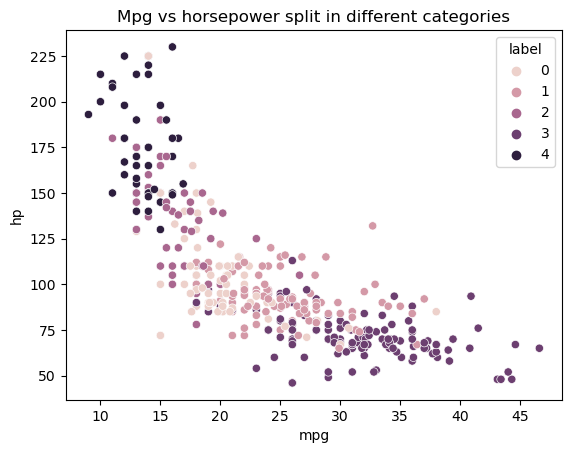

In [32]:
sns.scatterplot(x='mpg',y='hp',data=df,hue='label')
plt.title('Mpg vs horsepower split in different categories');

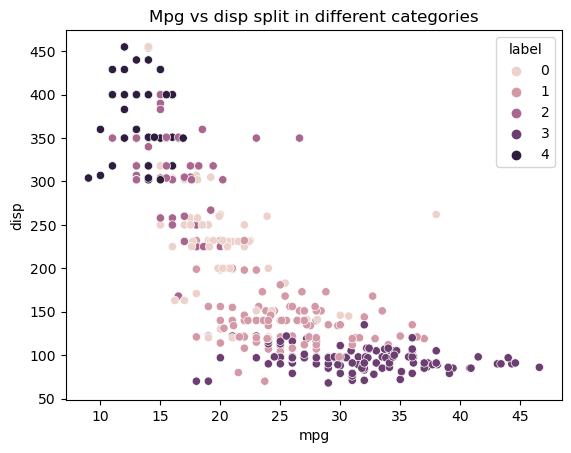

In [33]:
sns.scatterplot(x='mpg',y='disp',data=df,hue='label')
plt.title('Mpg vs disp split in different categories');

### Part 1.3 g - Pass a new DataPoint and predict which cluster it belongs to. 

In [34]:
# new data point
mpg = 25
cyl = 8
disp = 310
hp = 145
wt = 3409
acc = 12.1
yr=70
origin = 1

In [35]:
S = pd.DataFrame({'mpg': mpg,'cyl':cyl,'disp':disp,'hp':hp,'wt': wt,'acc': acc,'yr':yr,'origin': origin},index=range(0,1))

In [36]:
print(f'Point S belongs to label: {model_optimal.predict(S)[0]}')

Point S belongs to label: 0


### Part 2. 1 a - Read ‘vehicle.csv’ and save as DataFrame.

In [37]:
vehicle_df = pd.read_csv('vehicle.csv')
vehicle_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


### Part 2.1 b- Check percentage of missing values and impute with correct approach.

In [38]:
percent_missing = vehicle_df.isnull().sum() * 100 / len(vehicle_df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing},index=vehicle_df.columns)

In [39]:
missing_value_df

,percent_missing
compactness,0.000000
circularity,0.591017
distance_circularity,0.472813
radius_ratio,0.709220
pr.axis_aspect_ratio,0.236407
max.length_aspect_ratio,0.000000
scatter_ratio,0.118203
elongatedness,0.118203
pr.axis_rectangularity,0.354610
max.length_rectangularity,0.000000


In [40]:
from sklearn.impute import SimpleImputer
X= vehicle_df.drop('class',axis=1)
si = SimpleImputer(strategy = 'median')
X_fit = si.fit_transform(X)

In [41]:
X = pd.DataFrame(X_fit,columns=X.columns)

In [42]:
X.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
dtype: int64

In [43]:
X.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0


### Part 2.1 c- Visualize a Pie-chart and print percentage of values for variable ‘class’.

In [44]:
X['class'] = vehicle_df['class']

In [45]:
X.groupby('class').count().iloc[:,0]

class
bus    218
car    429
van    199
Name: compactness, dtype: int64

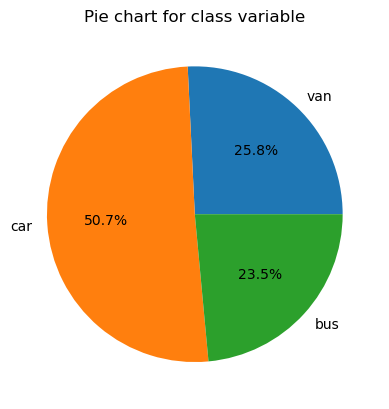

In [46]:
plt.pie(X.groupby('class').count().iloc[:,0],labels=X['class'].unique(),autopct='%1.1f%%')
plt.title('Pie chart for class variable');

### Part 2.1 d - Check for duplicate rows in the data and impute with correct approach.

In [47]:
any(X.duplicated())

False

### Part 2.2 a - Split data into X and Y.

In [49]:
y=X['class']
X=X.drop('class',axis=1)

X.shape,y.shape

((846, 18), (846,))

In [68]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((676, 18), (170, 18), (676,), (170,))

### Part 2.2 b - Standardize the Data.

In [69]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train = pd.DataFrame(ss.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(ss.transform(X_test),columns=X_test.columns)
X_train

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,-0.443190,0.349898,0.182642,-0.252763,0.249020,0.252818,-0.169670,0.129128,-0.213492,0.818422,-0.360671,-0.276567,0.331933,0.086293,0.522964,-1.434963,-0.644109,-0.124558
1,1.008227,1.156070,1.206724,1.274414,0.249020,0.252818,1.058019,-1.033025,0.972702,0.614846,0.837350,1.039353,0.362851,-0.949610,-1.296198,0.690099,0.629508,0.954946
2,1.371081,1.317305,1.654760,1.068832,0.129036,0.650734,1.641171,-1.291281,1.763498,1.361293,1.225897,1.595865,0.826620,-0.172682,1.735739,2.479625,-0.007301,0.954946
3,2.580596,1.156070,1.142719,0.980726,0.009052,0.252818,1.487710,-1.291281,1.368100,1.157716,1.323034,1.508910,1.228553,-0.043195,1.533610,-0.987581,-0.166503,0.145318
4,1.854887,1.639774,0.886699,0.628301,-0.590867,-0.543014,2.224324,-1.678665,2.158896,1.497011,2.553433,2.436431,2.094254,1.640148,0.320835,-0.428354,-0.803312,-1.608876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,0.403470,2.284712,1.654760,1.685577,0.968922,0.451776,1.702556,-1.420409,1.763498,2.582753,1.193518,1.711806,1.352224,-0.302170,0.725093,1.361171,-0.484907,0.280256
672,0.645373,0.188663,1.462745,1.156939,0.249020,0.451776,0.873866,-0.903897,0.972702,0.275551,0.772592,0.801676,-0.471933,-0.949610,-1.296198,2.255934,0.788710,1.224822
673,-1.410802,0.027429,-0.905446,-0.575819,0.848938,-0.741973,-0.630053,0.516512,-0.608889,-0.267320,-0.619702,-0.664966,0.301015,0.992708,-0.285552,-1.434963,-1.280918,-1.608876
674,-1.047948,-1.262447,-0.905446,-0.722663,-0.230915,-0.543014,-1.182513,1.291281,-1.004287,-1.217344,-1.234902,-1.064959,-1.646813,-0.949610,-0.689810,0.130872,0.947912,0.954946


### Part 2.3 a - Train a base Classification model using SVM

In [70]:
from sklearn.svm import SVC

model = SVC(gamma='auto')

model.fit(X_train,y_train)

SVC(gamma='auto')

### Part 2.3 b - Print Classification metrics for train data.

In [71]:
model.score(X_train,y_train)

0.9763313609467456

In [72]:
model.score(X_test,y_test)

0.9647058823529412

In [73]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         bus       1.00      0.94      0.97        52
         car       0.96      0.97      0.97        78
         van       0.93      0.97      0.95        40

    accuracy                           0.96       170
   macro avg       0.96      0.96      0.96       170
weighted avg       0.97      0.96      0.96       170



### Part 2.3 c - Apply PCA on the data with 10 components. 

In [74]:
from sklearn.decomposition import PCA

#applying PCA on the data with all ten components
pca = PCA(n_components = 10)
pca.fit(X_train)

transformed_pca = pca.transform(X_train)

cum_explained_var = []

for i in range(0, len(pca.explained_variance_ratio_)):
    if i == 0:
        cum_explained_var.append(pca.explained_variance_ratio_[i])
    else:
        cum_explained_var.append(pca.explained_variance_ratio_[i] + 
                                 cum_explained_var[i-1])

print(cum_explained_var)

[0.521858595801731, 0.6872907208413785, 0.7983779006971498, 0.8658249122164663, 0.91566149111775, 0.9428620923049701, 0.9615174049618437, 0.9738879184615221, 0.982570401123882, 0.9876288990623496]


### Part 2.3 d - Visualize Cumulative Variance Explained with Number of Components.

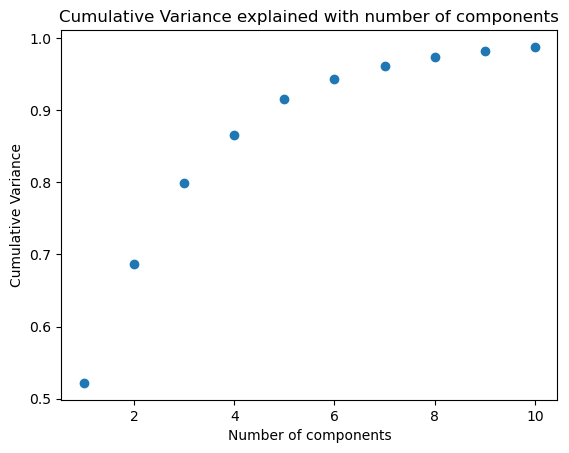

In [75]:
cum_explained_var_final = {i+1:x for i,x in enumerate(cum_explained_var)}
plt.scatter(x=cum_explained_var_final.keys(),y=cum_explained_var_final.values());
plt.title('Cumulative Variance explained with number of components')
plt.ylabel('Cumulative Variance')
plt.xlabel('Number of components');

### Part 2.3 e - Draw a horizontal line on the above plot to highlight the threshold of 90%.

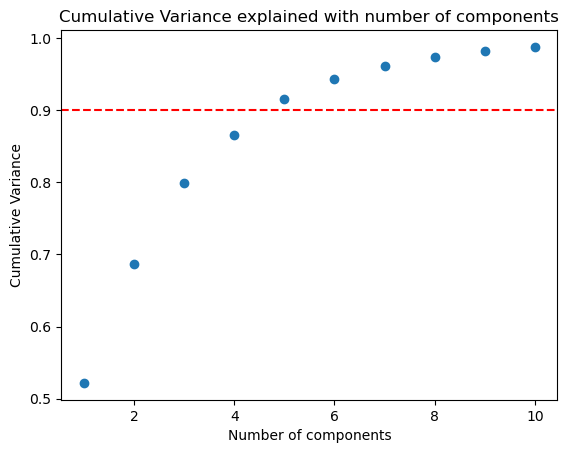

In [76]:
cum_explained_var_final = {i+1:x for i,x in enumerate(cum_explained_var)}
plt.scatter(x=cum_explained_var_final.keys(),y=cum_explained_var_final.values());
plt.axhline(0.9,color='red',linestyle='--')
plt.title('Cumulative Variance explained with number of components')
plt.ylabel('Cumulative Variance')
plt.xlabel('Number of components');

### Part 2.3 f - Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained.

In [77]:
components = 5

pca_final = PCA(n_components = components)
pca_final.fit(X_train)
transformed_pca_X_train_final = pca_final.transform(X_train)
transformed_pca_X_train_final = pd.DataFrame(transformed_pca_X_train_final,
                                             columns = [f'Col{i}' for i in range(1,6)])
transformed_pca_X_test_final = pca_final.transform(X_test)
transformed_pca_X_test_final = pd.DataFrame(transformed_pca_X_test_final,
                                             columns = [f'Col{i}' for i in range(1,6)])
transformed_pca_X_train_final

,Col1,Col2,Col3,Col4,Col5
0,-0.108013,0.859553,0.233667,1.589269,-0.434747
1,3.304115,-1.238090,0.054202,-1.214527,-0.924130
2,4.865603,-0.676242,-0.413415,-0.695719,2.597824
3,4.553991,0.217619,-0.608888,1.633308,0.431826
4,5.557713,2.993475,-1.471294,0.128443,-0.046786
...,...,...,...,...,...
671,5.511132,0.483027,0.144495,-0.210834,0.888674
672,2.572736,-1.963007,0.274153,-2.625200,0.166389
673,-2.045948,2.419043,0.428406,0.837944,-0.979717
674,-3.677319,-2.032264,0.004481,-0.531270,-0.513007


### Part 2.3 g - Train SVM model on components selected from above step.

In [78]:
svc = SVC(gamma='auto')
svc.fit(transformed_pca_X_train_final,y_train)

SVC(gamma='auto')

### Part 2.3 h - Print Classification metrics for train data of above model and share insights.

In [79]:
svc.score(transformed_pca_X_train_final,y_train)

0.8668639053254438

In [80]:
svc.score(transformed_pca_X_test_final,y_test)

0.788235294117647

In [81]:
y_pred = svc.predict(transformed_pca_X_test_final)

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         bus       0.73      0.84      0.78        45
         car       0.86      0.81      0.83        83
         van       0.72      0.69      0.71        42

    accuracy                           0.79       170
   macro avg       0.77      0.78      0.77       170
weighted avg       0.79      0.79      0.79       170



### Insights:
<li>Accuracy may have decreased but overfitting has definitely reduced compared to before.</li>
<li>There is a steady precision,recall and f-1 score shown in the classification report.</li>

### Part 2.4 a - Train another SVM on the components out of PCA. Tune the parameters to improve performance

In [82]:
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001], 
              'kernel': ['rbf']} 

In [83]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(SVC(),param_grid=param_grid)
grid.fit(transformed_pca_X_train_final,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']})

In [85]:
grid.best_estimator_

SVC(C=10, gamma=0.1)

### Part 2.4 b- Share best Parameters observed from above step.

In [86]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [87]:
grid.best_score_

0.8120806100217864

In [89]:
svc_final = SVC(C=10,gamma=0.1,kernel='rbf')
svc_final.fit(transformed_pca_X_train_final,y_train)


SVC(C=10, gamma=0.1)

### Part 2.4 c- Print Classification metrics for train data of above model and share relative improvement in performance in all the models along with insights.

In [90]:
svc_final.score(transformed_pca_X_test_final,y_test)

0.8058823529411765

In [92]:
y_preds_final = svc_final.predict(transformed_pca_X_test_final)
print(classification_report(y_preds_final,y_test))

              precision    recall  f1-score   support

         bus       0.79      0.82      0.80        50
         car       0.90      0.82      0.86        85
         van       0.65      0.74      0.69        35

    accuracy                           0.81       170
   macro avg       0.78      0.80      0.79       170
weighted avg       0.81      0.81      0.81       170



Insights:
<li>Performance has improved compared to previous parameters before gridsearch hyper tuning.</li>
<li>Overfitting has significantly reduced</li>

### Part 2.5 a - Explain pre-requisite/assumptions of PCA.

<li>There must be linearity in the data set, i.e. the variables combine in a linear manner to form the dataset. The variables exhibit relationships among themselves.</li>
<li>There needs to be a linear relationship between all variables.</li>
<li>You should have sampling adequacy, which simply means that for PCA to produce a reliable result, large enough sample sizes are required.</li>
<li>You have multiple variables that should be measured at the continuous level (although ordinal variables are very frequently used).</li>

### Part 2.5 b - Explain advantages and limitations of PCA.

#### Advantages
1. Removes Correlated Features: In a real world scenario, this is very common that you get thousands of features in your dataset. You cannot run your algorithm on all the features as it will reduce the performance of your algorithm and it will not be easy to visualize that many features in any kind of graph. 

2. Improves Algorithm Performance: With so many features, the performance of your algorithm will drastically degrade. PCA is a very common way to speed up your Machine Learning algorithm by getting rid of correlated variables which don't contribute in any decision making. The training time of the algorithms reduces significantly with less number of features. 

3. Reduces Overfitting: Overfitting mainly occurs when there are too many variables in the dataset. So, PCA helps in overcoming the overfitting issue by reducing the number of features.

4. Improves Visualization: It is very hard to visualize and understand the data in high dimensions. PCA transforms a high dimensional data to low dimensional data (2 dimension) so that it can be visualized easily. 

#### Limitations
1. Independent variables become less interpretable: After implementing PCA on the dataset, your original features will turn into Principal Components. Principal Components are the linear combination of your original features. Principal Components are not as readable and interpretable as original features.

2. Data standardization is must before PCA: You must standardize your data before implementing PCA, otherwise PCA will not be able to find the optimal Principal Components. 

3. Information Loss: Although Principal Components try to cover maximum variance among the features in a dataset, if we don't select the number of Principal Components with care, it may miss some information as compared to the original list of features
